In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('./Protocols')
from pacing_protocol import PacingProtocol
sys.path.append('../')
import plot_cell
from model_scipy import ModelJK

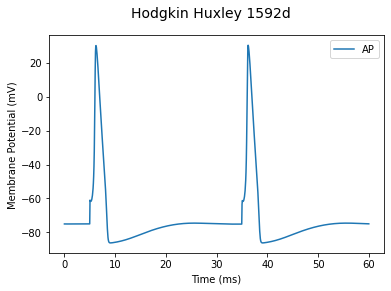

--- 9.114830255508423 seconds ---


In [4]:
from models.hh1592d import HH1592d
'''
Hodgkin Huxley 1592d
'''
protocol = PacingProtocol(level=1, start=5, length=0.03, period=30, multiplier=0, default_time_unit='ms')
model = HH1592d(protocol)
simulator = ModelJK(model)
start_time = time.time()
model.name = "Hodgkin Huxley 1592d"
times = np.linspace(0,60,1000)
d = simulator.simulate(times, method='LSODA', max_step=8e-4)    
# plot_cell.plot_AP(model.name, d.t, d.y[0])
plot_cell.plot_AP(model.name, simulator.times, simulator.V)
print("--- %s seconds ---"%(time.time()-start_time))

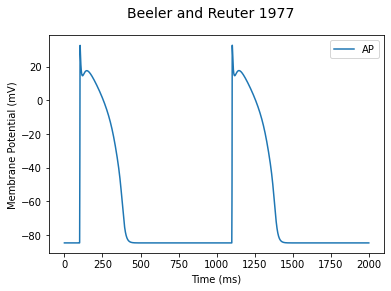

--- 1.057342290878296 seconds ---


In [5]:
from models.br1977 import BR1977
'''
Beeler and Reuter 1977
'''
protocol = PacingProtocol(level=1, start=100, length=2, period=1000, multiplier=0, default_time_unit='ms')
model = BR1977(protocol)
simulator = ModelJK(model)
start_time = time.time()
model.name = "Beeler and Reuter 1977"
times = np.linspace(0, 2000, 5000)
d = simulator.simulate(times)    
# plot_cell.plot_AP(model.name, d.t, d.y[0])
plot_cell.plot_AP(model.name, simulator.times, simulator.V)
print("--- %s seconds ---"%(time.time()-start_time))